<a href="https://colab.research.google.com/github/theanupam7/EDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA DESCRIPTION : Haberman Dataset Contain cases from study conducted during the year 1958-1970. It has 306 lines of Data, 4 columns as 'age','year','node','status' . 
Objective : We have to classify the data in class 1 or 2 meaning a patient has survived the cancer for >=5 years and class 2 indicates whether the person died in  <= 5 years.

# Basic Info About the Dataset : 


Let's import some necessary libraries and read the dataset in variable 'D'


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset 'haberman.csv' in variable 'D'
D = pd.read_csv("haberman.csv")




Now Let's Print First 10 rows of the Dataset 'D'

In [5]:
D.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
print(D.shape)  # No. of Data-Points(Rows) and Features (columns) in DataFrame 

(306, 4)


In [8]:
print(D.columns)  #Printing the column names here!
print(type(D))  

Index(['age', 'year', 'nodes', 'status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


Now, Let's see how many Data Points are present in each features (Columns) !!

Here, Class '1' and Class'2' represents the No of Patients.

In [10]:
print("Value_Counts : \n")
#D["year"].value_counts() 
D["status"].value_counts()  #No. of data points of a particular class!


Value_Counts : 



1    225
2     81
Name: status, dtype: int64

Here above, We now know that Class 1 has 225 people and class 2 has 81 people. Now, lets look at the last 5 rows of our DataSet.

In [11]:
D.tail()    #Printing the last 5 rows

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [12]:
D.info()    #Printing the concise summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
D.describe()    #Printing the Basic Statistical summary of DataFrame

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# '2D' & '3D' Scatter Plot


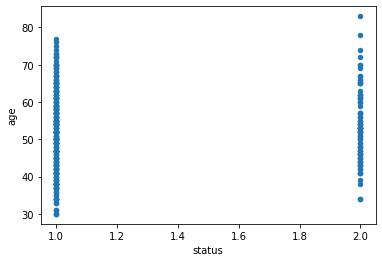

In [15]:
#Here we are plotting Scatter Plots (This is a 2D plot btw!)
D.plot(kind='scatter', x='status', y='age') ;
plt.show()

Above as shown, Status (X-axis) represent Total No of patients in Class 1 and Class 2.
Age (Y-axis) represents the Age of the Patients according to class 1 and class 2.
Also , from above conclusion we can say that its a Binary Class Classification Problem !

Now , Lets see about colour Coding !

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


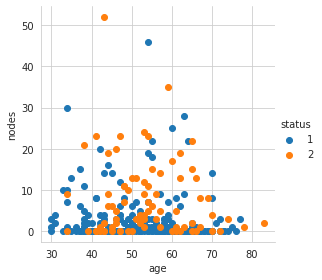

In [24]:
sns.set_style("whitegrid");
sns.FacetGrid(D, hue="status", size=4)\
   .map(plt.scatter, "age", "nodes")\
   .add_legend();
plt.show();

We can see in above figure that orange and blue points cant be easily seperated. Also we can already draw Pair Plot for each available features. So instead of cheking features on by one, Lets plot a pair plot !

Those kind of Plots are 3D Scatter Plots. Here also, we can only visualise in 2D plots !

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


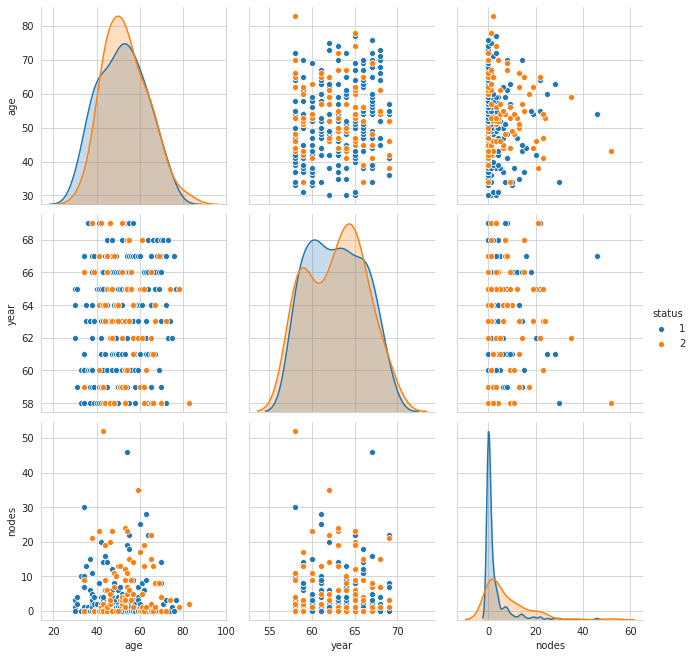

In [25]:
sns.set_style("whitegrid");
sns.pairplot(D, hue="status", size=3);
plt.show()

In above pair-plots, the orange points represent the Class '2' patients and the blue one are for patients of Class '1' 
Note that the plots on either side of Diagonal elements are same. Hence we can only study and observe plots on either side of the diagonal element only and give full information !
The main limitation of pair plot is it can operate in very small dimensions only!
- Here 'age', 'year' might be useful in Classification of Patient types!
- In pair-plots, the Diagonal Elements are known as Probability Density Functions or PDF ! Lets see PDF in action.

# PDF (Probability Density Function) :
It is a smoothed form of Histogram ! 
- It basically show the number of data point that are present in a given interval.


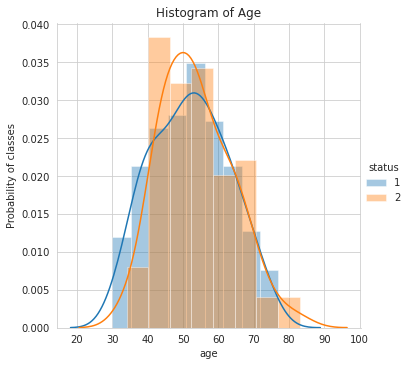

In [27]:
#Let's plot a histogram 
sns.FacetGrid(D, hue = 'status',height= 5).map(sns.distplot,"age").add_legend()
plt.title("Histogram of Age")
plt.ylabel("Probability of classes")
plt.show()

Here Y-axis represents the no of patients(of both classes)!
- Orange and Red colour represent the Status of Patients.(1 or 2)

Similarly we can plot the Histogram and PDF for all other features(columns) as follows :

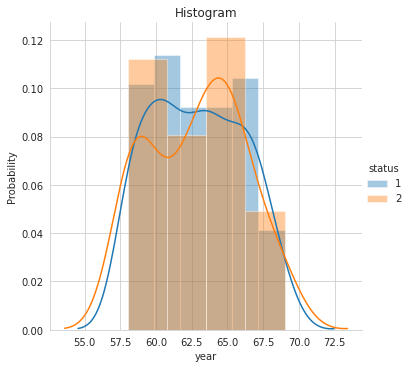

In [28]:
sns.FacetGrid(D, hue = 'status',height= 5).map(sns.distplot,"year").add_legend()
plt.title("Histogram")
plt.ylabel("Probability")
plt.show()

Here we can see that both types of patients are overlapping a lot ! It will be difficult for the model to seperate on basis of this Histogram .

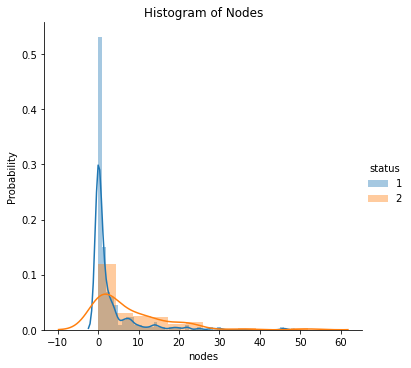

In [0]:
sns.FacetGrid(D, hue="status",height=5).map(sns.distplot,"nodes").add_legend()
plt.title("Histogram of Nodes")
plt.ylabel("Probability")
plt.show()

In all the PDFs shown above, the data is massively overlapping !

# CDF (Cummunlative Density Function) : 
CDF is basically a cummulative sum of PDF.Note :
   - AuC(PDF) = CDF
   - cdf = np.cumsum(pdf)

Here using CDF, we can easily determine what percentage of Data Points fall under a given interval(presented here in X-axis !

In [29]:
#We already know that AuC(PDF) = CDF !
D.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5, 1.0, 'CDF')

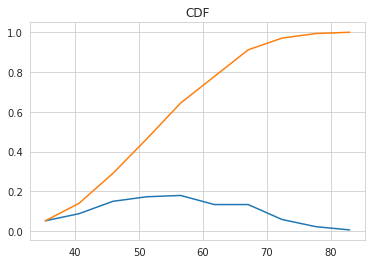

In [31]:
counts, bin_edges = np.histogram(D["age"], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")


Seeing the above plot, we can say that there are about 70% of patients are of age under 60.
Similarly 100% of patients are of age under age 85 (approx)
- Here Blue Line Represents PDF.
-Orange Line represents CDF (Accumulative sum of PDF upto that point) !


Text(0.5, 1.0, 'CDF')

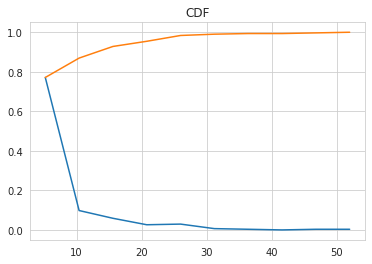

In [32]:
counts, bin_edges = np.histogram(D["nodes"], bins = 10, density = True)
pdf = counts/(sum(counts))
 #Interval Between the Numbers


cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")

We can draw CDF of every features also using one plot at same time Instead of plotting CDF for different fetures !

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 1.0, 'CDF')

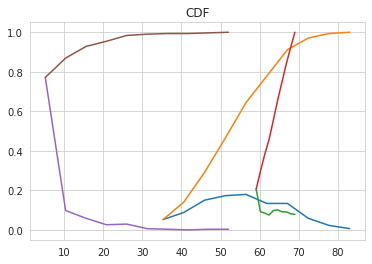

In [35]:
counts, bin_edges = np.histogram(D["age"], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF") 


counts, bin_edges = np.histogram(D["year"], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")

counts, bin_edges = np.histogram(D["nodes"], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")

Here the X-axis represents the node, age and year column(feature) for the Dataset and above in plots their pdf and cdf is shown respectively !

# Mean and Std-Dev :


In [38]:
D.describe()  #easily we can get all the things at one place!

#Here the problem is that the 'status' feature is also showing min as 1. We can edit that seperately!

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- Median : Also known as 50th percentile !
- 25% , 50% , 75% and 100% are known as Quantiles !
- The range between 25% and 75% is also known as Inter Quantile Range(IQR)


Here in above Plot we can see that the 'min' of Class Label (status) is also shown as 1. Since it is a class label, we can't computer its 'min' in this case ! If we want 'mean' of any specific column, we can calculate as follow :

In [41]:
# Columnwise, axis = 0 || Rowwise, axis = 1
print(np.mean(D, axis = 0))

age       52.457516
year      62.852941
nodes      4.026144
status     1.264706
dtype: float64


We can also calculate the Std-Dev similarly.

- Std-Dev mainly measures the spread of the Curve given a the Variance of curve!
- Std-Dev = sqrt(Variance)

In [45]:
# Similarly Std-Dev can also be easily calculated !
print(np.std(D , axis = 0))

age       10.785785
year       3.244091
nodes      7.177896
status     0.441176
dtype: float64


Standard Deviation of Each Feature is Shown above including class label column too(viz. 'status') !!

Lets also Plot the 'meadian' of each columns also as 'mean' can be easily affected using the outliers !

In [50]:
print(np.median(D['age'] , axis=0))
print(np.median(D['year'] , axis=0))
print(np.median(D['nodes'] , axis=0))

52.0
63.0
1.0


- Median do not get impacted by the outliers that much as compared to the mean !
- Median only gets corrupted if half the points of the 'array' are corrupted !

We can also plot a specific percentile on the dataset. Suppose we want to know the 90th percentile, We can calculate as follows :


In [52]:
print(np.percentile(D['age'], 90))

67.0


- 90% of the patients are under age 67 !

To Calculate Mean Absolute Deviation or MAD we have to do some importing !


In [60]:
!pip install statsmodels

In [64]:
from statsmodels import robust
print(robust.mad(D['age']))


11.860817748044816


MAD : Median of Absolute Deviation
- MAD = median ( |Deviation| ) 

# Box Plot and Whiskers :
 - A Box-plot graphically depict the group of numerical data through their quantiles!
 - Whishkers indicates the variability outside the upper and lower quantiles !
 - The Box shown in the Box- plot covers this IQR (Inter Quantile Range) using the concepts of percentiles. 
 - Again, IQR = Range between 25% to 75%


A Simple Hack : Box plot and whiskers can also be read as PDF from side !

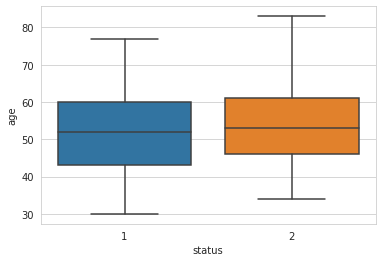

In [65]:
sns.boxplot(x='status',y='age',data = D)

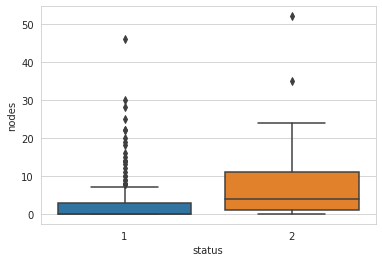

In [67]:
sns.boxplot(x = 'status', y = 'nodes',data = D)

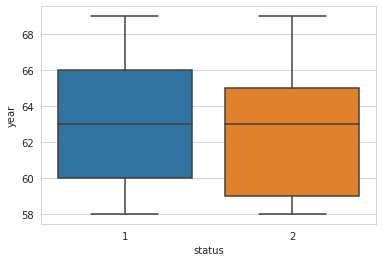

In [68]:
sns.boxplot(x = 'status',y = 'year', data = D)

# Violin Plots : 
 A violin plot is similar to box - plot except that they also show the probability density of data at different values.
 - A Violin Plots are more informative than the box plot !
 - Voilin Plots = Histogram + Box-Plot (Intutively)

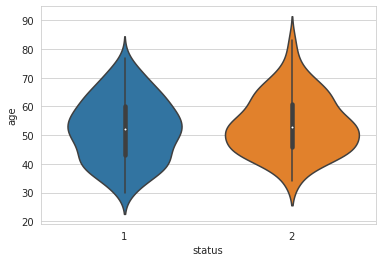

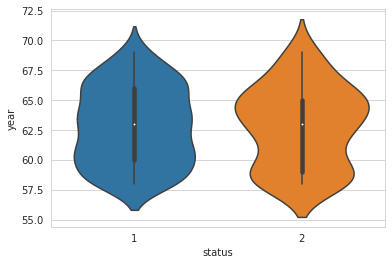

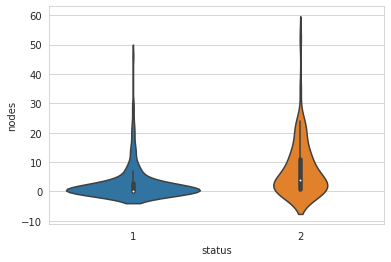

In [72]:
sns.violinplot(x="status", y="age", data=D, size=8)
plt.show()
sns.violinplot(x="status", y="year", data=D, size=8)
plt.show()
sns.violinplot(x="status", y="nodes", data=D, size=8)
plt.show()

# Multivariate Analysis : 
Contour Plot : 2D Density Plot

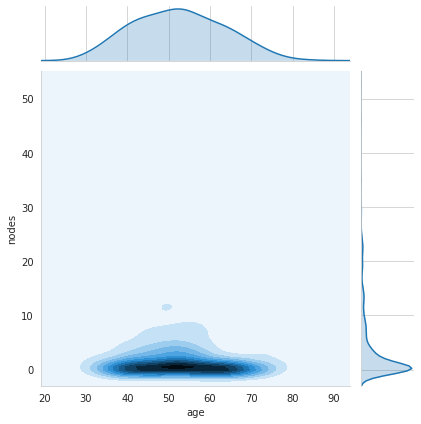

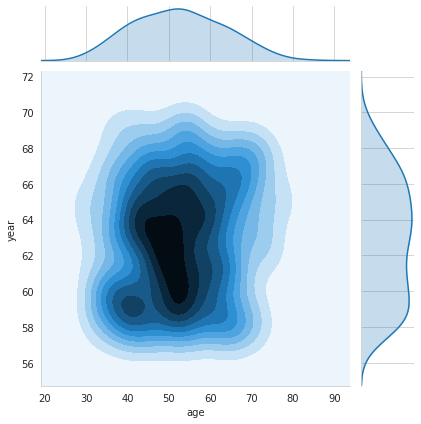

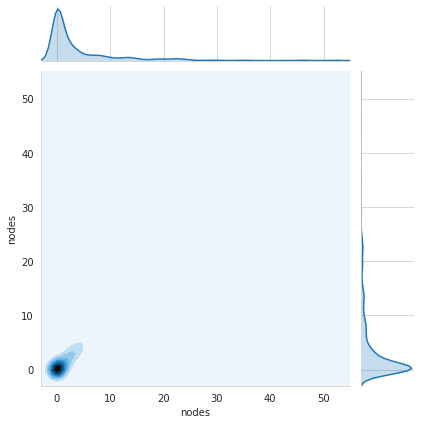

In [74]:
sns.jointplot(x="age", y="nodes", data=D, kind="kde");
plt.show();
sns.jointplot(x="age", y="year", data=D, kind="kde");
plt.show();
sns.jointplot(x="nodes", y="nodes", data=D, kind="kde");
plt.show();


Contour Plots give us sense of Density in a 2D Plane !